In [7]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
#Activate the first option if whole column width is necessary and the second to make all columns visible
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

## I. Import the processed dataset

In [9]:
#Get the report and store it into a dataframe. Check what columns are included in the file
report = pd.read_csv('AADT_processed_v1.csv', dtype = str, index_col = 0)
print(report.columns)
print(report.shape)

Index(['FEATURE_ID', 'SITE_CODE', 'SITE_NAME', 'TOWN', 'ROADCLASS',
       'HIERARCHY', 'CUSTOMER', 'AREA_NAME', 'DISTANCE', 'ROAD_TYPE',
       'Confidence', 'AADT_Comb', 'AADT_Source_Comb', 'AADT_Source_Type',
       'ModifiedDate', 'Checked', 'SurveyID'],
      dtype='object')
(18706, 17)


In [10]:
report.head(5)

,FEATURE_ID,SITE_CODE,SITE_NAME,TOWN,ROADCLASS,HIERARCHY,CUSTOMER,AREA_NAME,DISTANCE,ROAD_TYPE,Confidence,AADT_Comb,AADT_Source_Comb,AADT_Source_Type,ModifiedDate,Checked,SurveyID
0,A505/95,27901268,Bedford Road,Hitchin,Principal Road - A,MN Main Distributor,HH: Hertfordshire Highways,N: 5-North Herts District,57,Carriageway Oneway 1-Lane,Level 0,600,Assumed: Unassigned_0,Default Value,NaN,NaN,NaN
1,A505/96,27901268,Bedford Road,Hitchin,Principal Road - A,MN Main Distributor,HH: Hertfordshire Highways,N: 5-North Herts District,33.1,Carriageway Oneway 1-Lane,Level 0,600,Assumed: Unassigned_0,Default Value,NaN,NaN,NaN
2,5U270/30,27901749,Blackhorse Lane,Hitchin,Unclassified Road - U,L2 Local Access,HH: Hertfordshire Highways,N: 5-North Herts District,99,Single 2-Lane Carriageway,Level 0,600,Assumed: Unassigned_0,Default Value,NaN,NaN,NaN
3,5U353/50,27901485,Benslow Lane,Hitchin,Unclassified Road - U,L2 Local Access,HH: Hertfordshire Highways,N: 5-North Herts District,13.98,Single 2-Lane Carriageway,Level 0,600,Assumed: Unassigned_0,Default Value,NaN,NaN,NaN
4,5U1444/10,27902849,Cambridge Road,Hitchin,Unclassified Road - U,L2 Local Access,HH: Hertfordshire Highways,N: 5-North Herts District,87,Single 2-Lane Carriageway,Level 0,1500,Assumed: Service_shops_etc_6,Default Value,NaN,NaN,NaN


### Road classification counts: Class, Hierarchy, Customer

In [11]:
report['ROADCLASS'].value_counts()

Unclassified Road - U           15867
Unnumbered Classified Rd - C     1207
Principal Road - A               1105
Numbered Classified Road - B      527
Name: ROADCLASS, dtype: int64

In [12]:
#Eventually, compare with road classifications:
report['HIERARCHY'].value_counts()

L2 Local Access             15871
L1 Local Distributor         1103
MN Main Distributor           789
SD Secondary Distributor      627
PR Primary Distributor        316
Name: HIERARCHY, dtype: int64

In [13]:
#Validate that customer has no other value
report['CUSTOMER'].value_counts()

HH: Hertfordshire Highways    18706
Name: CUSTOMER, dtype: int64

In [26]:
report['ROAD_TYPE'].value_counts()

Single 2-Lane Carriageway    17011
Dual 2 Lane                    446
Roundabout                     400
Single Lane Carriageway        341
Carriageway Oneway 2-Lane      276
Carriageway Oneway 1-Lane      157
Carriageway Oxbow-Layby         44
Dual 1 Lane                     11
Dual 3 Lane                      9
Carriageway Oneway 3-Lane        7
Single 3-Lane Carriageway        4
Name: ROAD_TYPE, dtype: int64

### Area Name and Town

In [14]:
report['AREA_NAME'].value_counts()

E: 3-East Herts District      2881
N: 5-North Herts District     2456
SW: 2-Dacorum Area            2435
MW: 6-St Albans Area          2159
MW: 0-Welwyn Hatfield Area    1757
N: 7-Stevenage Area           1640
MW: 4-Hertsmere District      1573
E: 1-Broxbourne Area          1554
SW: 8-3 Rivers District       1241
SW: 9-Watford Area            1010
Name: AREA_NAME, dtype: int64

In [18]:
100*report['AREA_NAME'].value_counts(normalize=True)

E: 3-East Herts District      15.401475
N: 5-North Herts District     13.129477
SW: 2-Dacorum Area            13.017214
MW: 6-St Albans Area          11.541751
MW: 0-Welwyn Hatfield Area     9.392708
N: 7-Stevenage Area            8.767240
MW: 4-Hertsmere District       8.409067
E: 1-Broxbourne Area           8.307495
SW: 8-3 Rivers District        6.634235
SW: 9-Watford Area             5.399337
Name: AREA_NAME, dtype: float64

In [16]:
report['TOWN'].value_counts().head(10)

Stevenage                 1737
Hemel Hempstead           1339
St Albans                 1135
Watford                   1027
Welwyn Garden City         798
Bishop's Stortford         706
Cheshunt                   694
Hatfield                   609
Letchworth Garden City     511
Harpenden                  496
Name: TOWN, dtype: int64

In [19]:
#Show percentage of roads per town
100*report['TOWN'].value_counts(normalize=True).head(15)
#report.columns

Stevenage                 9.285791
Hemel Hempstead           7.158131
St Albans                 6.067572
Watford                   5.490217
Welwyn Garden City        4.266011
Bishop's Stortford        3.774190
Cheshunt                  3.710040
Hatfield                  3.255640
Letchworth Garden City    2.731744
Harpenden                 2.651556
Hitchin                   2.651556
Hertford                  2.475142
Borehamwood               2.448412
Hoddesdon                 1.956591
Potters Bar               1.806907
Name: TOWN, dtype: float64

In [21]:
ans = report.groupby(['TOWN'],as_index = False).size().sort_values(ascending = False).head(15).sum()
print('The instances covered by the top 15 codes are: ' + str(ans))
print('Which represents: '+str(round((ans*100)/report.shape[0]),) + '% of the total amount')

The instances covered by the top 15 codes are: 11173
Which represents: 60.0% of the total amount


### Validate Length of roads

In [22]:
#Identify unique values to validate that feature_id has one record per set
report.describe()

,FEATURE_ID,SITE_CODE,SITE_NAME,TOWN,ROADCLASS,HIERARCHY,CUSTOMER,AREA_NAME,DISTANCE,ROAD_TYPE,Confidence,AADT_Comb,AADT_Source_Comb,AADT_Source_Type,ModifiedDate,Checked,SurveyID
count,18706,18706,18706,18706,18706,18706,18706,18706,18706,18706,18706,18706,18706,18706,2939,2947,725
unique,18706,11147,8972,253,4,5,1,10,1794,11,4,2103,322,6,602,1,688
top,1U900/40,37821965,High Street,Stevenage,Unclassified Road - U,L2 Local Access,HH: Hertfordshire Highways,E: 3-East Herts District,50,Single 2-Lane Carriageway,Level 0,600,Assumed: Unassigned_0,Default Value,03/05/2017 11:40,Y,COM_2025 AECOM A414
freq,1,33,137,1737,15867,15871,18706,2881,160,17011,16019,7776,8368,14988,438,2947,4


In [23]:
#Show length metrics of roads
report['DISTANCE'] = report['DISTANCE'].astype(float)
report['DISTANCE'].describe()

count    18706.000000
mean       268.396122
std        364.571386
min          7.000000
25%         66.000000
50%        130.000000
75%        300.750000
max       3696.000000
Name: DISTANCE, dtype: float64

In [24]:
out = pd.cut(report['DISTANCE'], bins=10)
out.value_counts().reindex(out.cat.categories)

(3.311, 375.9]      14930
(375.9, 744.8]       2135
(744.8, 1113.7]       828
(1113.7, 1482.6]      428
(1482.6, 1851.5]      211
(1851.5, 2220.4]       95
(2220.4, 2589.3]       54
(2589.3, 2958.2]       14
(2958.2, 3327.1]        5
(3327.1, 3696.0]        6
Name: DISTANCE, dtype: int64

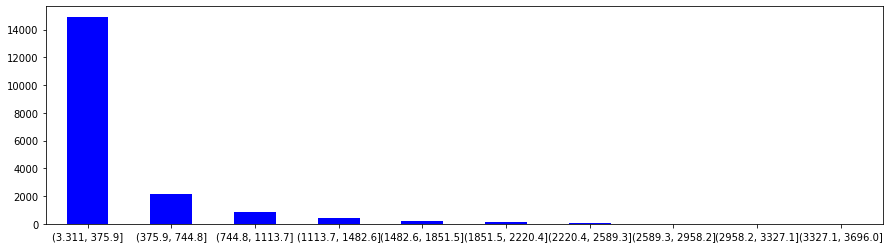

In [25]:
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
plt.show()

### Count per Confidence Levels

In [27]:
#Show Distribution of Confidence levels
report['Confidence'].value_counts()
#report.columns

Level 0    16019
Level 1     2458
Level 3      164
Level 2       65
Name: Confidence, dtype: int64

In [29]:
report.groupby(['HIERARCHY','Confidence']).agg({'Confidence': ['count']})

Confidence
                                         count
HIERARCHY                Confidence           
L1 Local Distributor     Level 0           631
                         Level 1           450
                         Level 2             2
                         Level 3            20
L2 Local Access          Level 0         14912
                         Level 1           954
                         Level 3             5
MN Main Distributor      Level 0           273
                         Level 1           432
                         Level 2            17
                         Level 3            67
PR Primary Distributor   Level 0            64
                         Level 1           204
                         Level 2            42
                         Level 3             6
SD Secondary Distributor Level 0           139
                         Level 1           418
                         Level 2             4
                         Level 3            66

In [30]:
report.groupby(['ROADCLASS','Confidence']).agg({'Confidence': ['count']})

Confidence
                                             count
ROADCLASS                    Confidence           
Numbered Classified Road - B Level 0           115
                             Level 1           351
                             Level 2             4
                             Level 3            57
Principal Road - A           Level 0           337
                             Level 1           636
                             Level 2            59
                             Level 3            73
Unclassified Road - U        Level 0         15036
                             Level 1           824
                             Level 2             2
                             Level 3             5
Unnumbered Classified Rd - C Level 0           531
                             Level 1           647
                             Level 3            29

In [54]:
report.groupby(['AADT_Source_Type','Confidence']).agg({'Confidence': ['count']})

Confidence
                                                    count
AADT_Source_Type                    Confidence           
Actual Count                        Level 0           115
                                    Level 1          1683
                                    Level 2            59
                                    Level 3           164
Default Value                       Level 0         14987
                                    Level 1             1
Estimate                            Level 0           684
                                    Level 1           771
                                    Level 2             6
Local Estimate                      Level 0             1
                                    Level 1             3
Local estimate                      Level 0             1
Mean from actuals on THIS link only Level 0           231

### AADT Traffic Count Metrics

In [33]:
#Show length metrics of roads
#Some elements will show decimals because their calculation method is by averaging and not by actual count
report['AADT_Comb'] = report['AADT_Comb'].astype(float)
report['AADT_Comb'].describe()

count    18706.000000
mean      1997.358831
std       4082.267110
min          1.000000
25%        600.000000
50%        600.000000
75%       1000.000000
max      54146.000000
Name: AADT_Comb, dtype: float64

In [50]:
report['DISTANCE'] = report['DISTANCE'].astype(str)
report.groupby(['ROADCLASS']).describe()

AADT_Comb                                    \
                                 count          mean          std    min   
ROADCLASS                                                                  
Numbered Classified Road - B     527.0   8584.177103  4647.876671  300.0   
Principal Road - A              1105.0  13677.032655  7725.925792  150.0   
Unclassified Road - U          15867.0    775.572538   949.671612    1.0   
Unnumbered Classified Rd - C    1207.0   4490.142847  3568.609923  154.0   

                                                                  
                                  25%      50%      75%      max  
ROADCLASS                                                         
Numbered Classified Road - B  5250.50   8500.0  11608.5  20851.0  
Principal Road - A            9500.00  14633.0  18749.0  54146.0  
Unclassified Road - U          600.00    600.0    750.0  19117.0  
Unnumbered Classified Rd - C  2336.25   4000.0   6000.0  34117.0

In [51]:
report.groupby(['HIERARCHY']).describe()

AADT_Comb                                             \
                             count          mean          std    min      25%   
HIERARCHY                                                                       
L1 Local Distributor        1103.0   3832.719296  3697.068418  150.0   1000.0   
L2 Local Access            15871.0    796.087424   911.310633    1.0    600.0   
MN Main Distributor          789.0  12465.545733  7194.516976  300.0   8500.0   
PR Primary Distributor       316.0  16701.916139  8176.731364  150.0  14000.0   
SD Secondary Distributor     627.0   8592.153642  4548.541325  300.0   5471.0   

                                                      
                              50%       75%      max  
HIERARCHY                                             
L1 Local Distributor       2500.0   5679.50  34117.0  
L2 Local Access             600.0    750.00  19000.0  
MN Main Distributor       13929.0  17000.00  31000.0  
PR Primary Distributor    16500.0  22412.75  54146.0  
SD Secondary Distributor   8500.0  11471.00  20851.0

In [52]:
report.groupby(['ROAD_TYPE']).describe()

AADT_Comb                                      \
                              count          mean          std      min   
ROAD_TYPE                                                                 
Carriageway Oneway 1-Lane     157.0   1955.187898  2679.170047    254.0   
Carriageway Oneway 2-Lane     276.0   3245.985507  5029.183897      1.0   
Carriageway Oneway 3-Lane       7.0  20700.000000  4915.010987  12500.0   
Carriageway Oxbow-Layby        44.0    589.204545   305.301877    300.0   
Dual 1 Lane                    11.0   5040.909091  8825.688873    300.0   
Dual 2 Lane                   446.0  15060.553812  6677.746775    500.0   
Dual 3 Lane                     9.0  14558.222222  5019.380409   1500.0   
Roundabout                    400.0   4090.037500  7059.352349    150.0   
Single 2-Lane Carriageway   17011.0   1599.088666  3225.506517      2.0   
Single 3-Lane Carriageway       4.0   5012.750000  4559.292736    750.0   
Single Lane Carriageway       341.0    666.476540   437.563158     58.0   

                                                                
                               25%      50%       75%      max  
ROAD_TYPE                                                       
Carriageway Oneway 1-Lane    600.0   1000.0   1500.00  15500.0  
Carriageway Oneway 2-Lane    750.0   1500.0   1500.00  26322.0  
Carriageway Oneway 3-Lane  18494.0  21500.0  24267.50  25377.0  
Carriageway Oxbow-Layby      300.0    600.0    600.00   1500.0  
Dual 1 Lane                  375.0    750.0   6250.00  28500.0  
Dual 2 Lane                11058.5  15000.0  19566.50  54146.0  
Dual 3 Lane                15500.0  15500.0  16807.00  18098.0  
Roundabout                   600.0    750.0   1500.00  30000.0  
Single 2-Lane Carriageway    600.0    600.0    750.00  34117.0  
Single 3-Lane Carriageway   1312.5   4750.0   8450.25   9801.0  
Single Lane Carriageway      300.0    600.0    750.00   4532.0